# Heart Disease Prediction

## Introduction
The purpose of this project is to build and evaluate machine learning models that can predict the likelihood of heart disease based on patient health data. By testing multiple classifiers and comparing their performance, the analysis aims to answer key questions such as:

*   Which machine learning algorithms perform best for heart disease prediction?

*   How do different models balance accuracy and recall, especially given the medical importance of minimizing false negatives?

*   Can scaling features improve the performance of models that are sensitive to feature magnitudes?

*   What trade-offs exist between interpretability and predictive power across the chosen models?

The ultimate goal is to transform raw medical data into actionable insights that support early detection of heart disease, where recall (catching as many true cases as possible) is prioritised over overall accuracy.

Benchmark multiple classifiers for heart disease prediction. Evaluation includes accuracy, recall, and ROC/AUC. Medical context prioritises recall to minimise false negatives.

##Data Loading


In [ ]:
import pandas as pd


df = pd.read_csv('/heart.csv')

df.head()

## Train/Test Split
Separate features/labels and create the train/test split exactly as written.

In [21]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

## Train Scale-Insensitive Models
Random Forest, Gaussian Naive Bayes, and Gradient Boosting trained on raw features.

In [22]:
#Scale insenstive models

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=9)
forest.fit(X_train, y_train)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

## Scaling & Train Scale-Sensitive Models
Standardise features and fit KNN, Logistic Regression, and SVC on scaled data.

In [23]:
#Scale Insensitive models

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

## Baseline Accuracy Scores
Compute `.score` on the test set for each model (accuracy).

In [24]:
forest.score(X_test, y_test)

nb.score(X_test, y_test)

gb.score(X_test, y_test)

knn.score(X_test_scaled, y_test)

lr.score(X_test_scaled, y_test)

svc.score(X_test_scaled, y_test)

0.9341463414634147

## Recall Comparison (Medical Priority)
Recall is emphasised to reduce false negatives.

In [25]:
#RFC performs the best but as the data is medical related. It may be best not to potentially miss any. It is better to predict someone will have heart disease but find out they will be healthy. So recalls may be better than precision and accuracy in this case. Recall asks how many with disease are detected. A false postive is better than a false negative in this case.

from sklearn.metrics import recall_score

y_pred = forest.predict(X_test)
print('Forest:',recall_score(y_test, y_pred))

y_pred = nb.predict(X_test)
print('Gaussian NB:',recall_score(y_test, y_pred))

y_pred = gb.predict(X_test)
print('Gradient Boosting Classifier:',recall_score(y_test, y_pred))

y_pred = knn.predict(X_test_scaled)
print('KNN:',recall_score(y_test, y_pred))

y_pred = lr.predict(X_test_scaled)
print('Log:',recall_score(y_test, y_pred))

y_pred = svc.predict(X_test_scaled)
print('SVC:',recall_score(y_test, y_pred))

Forest: 0.9859154929577465
Gaussian NB: 0.9014084507042254
Gradient Boosting Classifier: 0.9859154929577465
KNN: 0.8732394366197183
Log: 0.92018779342723
SVC: 0.9530516431924883


## ROC Curve & AUC for Baseline RandomForest
Plot ROC and compute AUC

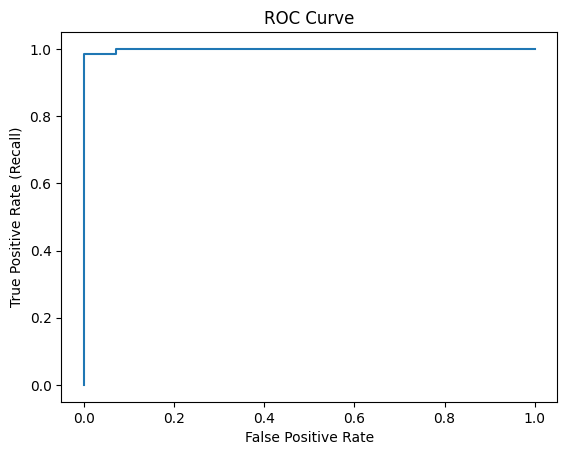

np.float64(0.9989990705655251)

In [26]:
#Results from this are Forest: 0.9859154929577465 Gaussian NB: 0.9014084507042254 Gradient Boosting Classifier: 0.9859154929577465 KNN: 0.8732394366197183 Log: 0.92018779342723 SVC: 0.9530516431924883

#RFC had the highest recall score. Equal match with Gradient boosting classifier. Because the RFC also had the highest accuracy score. I will use this.

#ROC to show trade off between 2 metrics which are..

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test, y_probs)

## Hyperparameter Tuning (GridSearchCV)


In [27]:
#hyperparamenter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2',None]
}

forest = RandomForestClassifier(n_jobs=1,random_state=9)
grid = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1,verbose=2)


grid.fit(X_train, y_train)

best_forest = grid.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


Fitting 3 folds for each of 324 candidates, totalling 972 fits


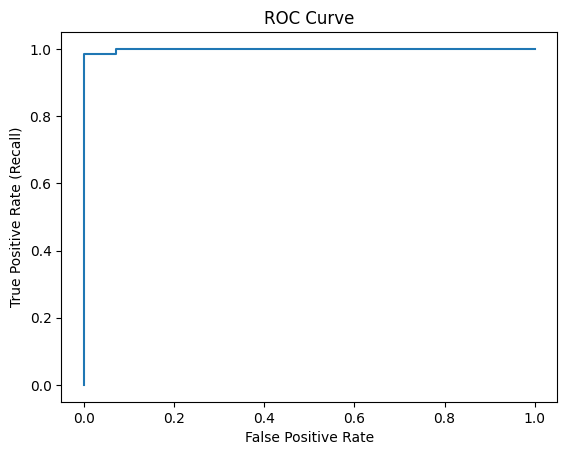

best_forest: 0.9859154929577465


In [19]:



#hyperparamenter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2',None]
}

forest = RandomForestClassifier(n_jobs=1,random_state=9)
grid = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1,verbose=2)

grid.fit(X_train, y_train)

best_forest = grid.best_estimator_

best_forest

best_forest.score(X_test, y_test)

y_probs = best_forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

y_pred = best_forest.predict(X_test)
print('best_forest:',recall_score(y_test, y_pred))

## Feature Importance & Correlation Heatmap
Visualise feature importances and correlation heatmap exactly as written.

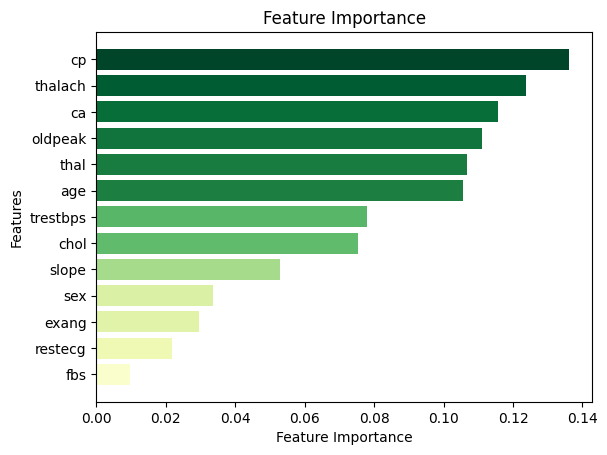

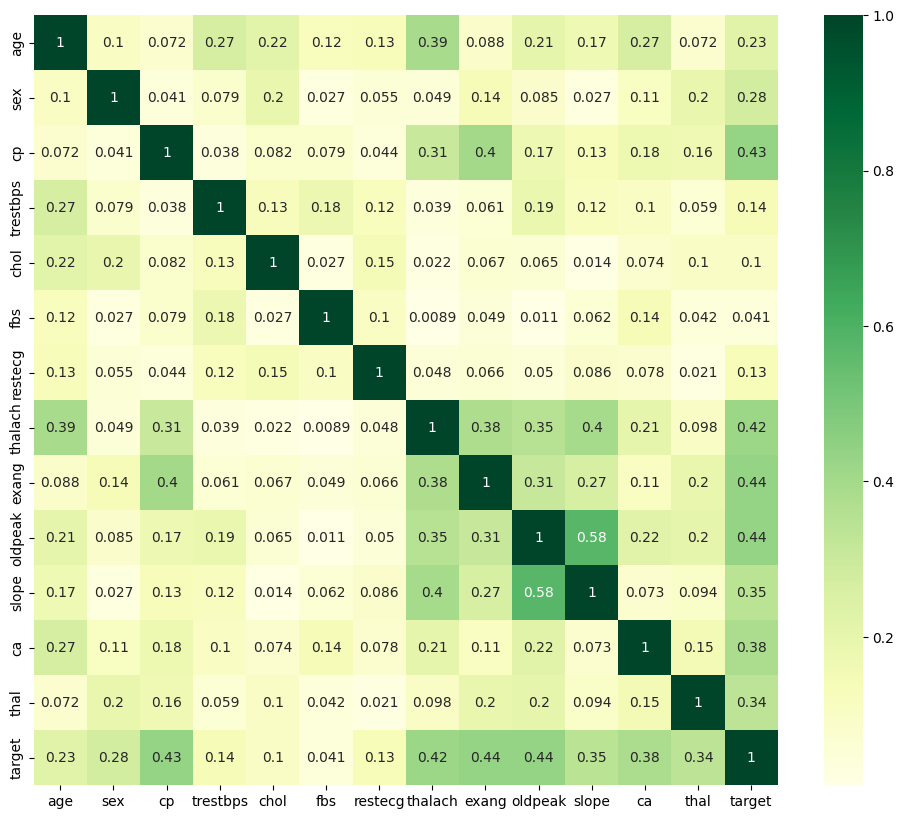

In [28]:
#Feature Importances

import numpy as np
feauture_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx  = np.argsort(feauture_importances)
sorted_features = features[sorted_idx]
sorted_importances = feauture_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')
plt.show()

##Conclusion

This project explored the use of multiple machine learning algorithms to predict heart disease, with a focus on balancing accuracy and recall. The results highlighted several key insights:

*   Random Forest and Gradient Boosting provided strong overall accuracy, demonstrating the effectiveness of ensemble methods in handling complex relationships within medical data.

*   Logistic Regression and SVM, when scaled, offered competitive performance with the added benefit of interpretability, making them valuable in clinical settings where model transparency matters.

*   Recall proved critical — models that maximized recall were favored, as minimizing false negatives is essential in healthcare to ensure that high-risk patients are not overlooked.

*   Feature scaling significantly improved the performance of models sensitive to magnitude differences (e.g., KNN, SVM), underscoring the importance of preprocessing in predictive modeling.

This analysis demonstrates that machine learning can meaningfully contribute to early detection of heart disease. While no single model is universally “best,” the trade-offs between accuracy, recall, and interpretability guide which algorithms are most appropriate depending on the clinical context.

As next steps, future work could include hyperparameter tuning, cross-validation for robustness, and incorporating larger or more diverse datasets to improve generalizability.

##Author

Toyosi Kehinde